In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
from ot.datasets import make_1D_gauss as gauss
import seaborn as sns
import os
from tqdm import tqdm
import numpy.linalg as LA
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
import ot

In [3]:
np.random.seed(100)
n = 100
# bin positions
x = np.arange(n, dtype=np.float64)
# Gaussian mixtures
r = gauss(n, m=1 * n / 5, s=n / 20)  # m= mean, s= std
r += gauss(n, m=n/2, s=n/10)
r += 3 * gauss(n, m=4 * n / 5, s=n / 6)
# r /= a.sum()
c = gauss(n, m=3 * n / 5, s=n / 10)
c += 2 * gauss(n, m=35 * n / 100, s=n / 5)
# c /= b.sum()
# loss matrix
C = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
C /= C.max()
s = 0.9 * min(r.sum(), c.sum())

In [4]:
print(r.sum())
print(c.sum())
print(s)

5.000000000000001
3.0
2.7


In [4]:
source_hist = r
target_hist = c

Text(0.5, 1.0, 'POT matrix by APDAGD')

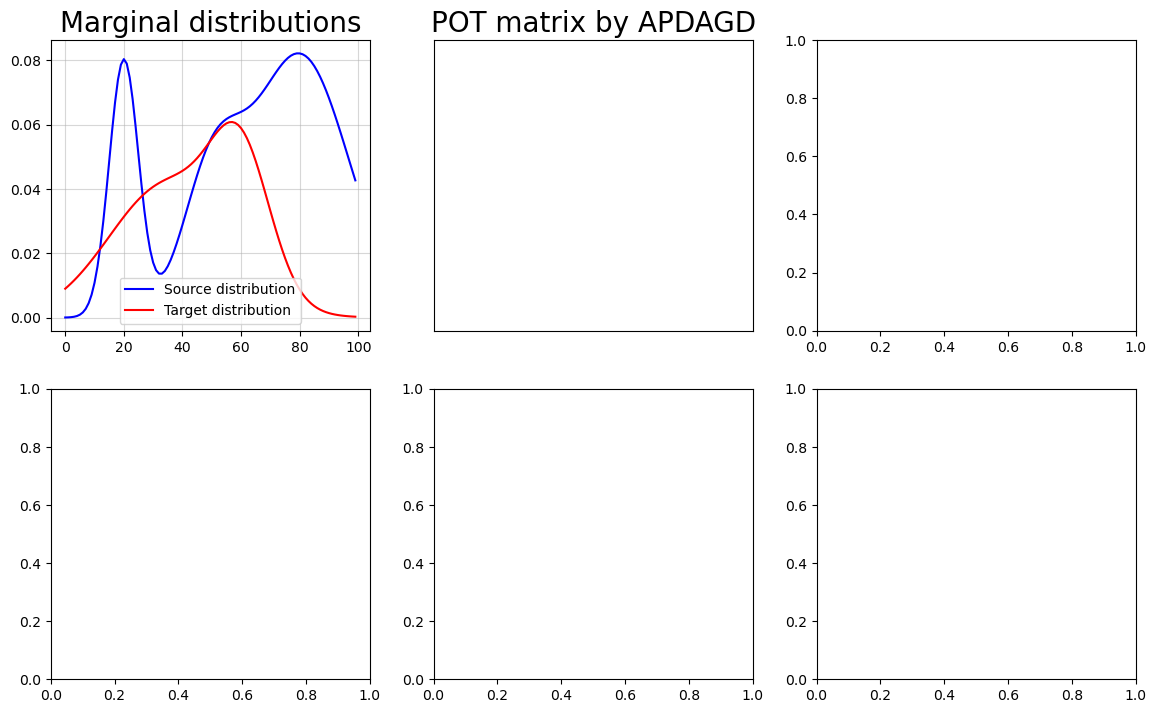

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8.3))
ax = axes[0, 0]
ax.plot(x, r, 'b', label='Source distribution')
ax.plot(x, c, 'r', label='Target distribution')
ax.set_title("Marginal distributions", size=20)
ax.grid(alpha=0.5)
ax.legend()

ax = axes[0, 1]
cmap = sns.color_palette("rocket_r", as_cmap=True)

ax.set_xticks([]); ax.set_yticks([])
ax.set_title("POT matrix by APDAGD", size=20)

In [6]:
from pot_solvers import apdagd, sinkhorn

In [7]:
from pot_solvers.lp import lp
X_lp = lp(source_hist, target_hist, C, s, tol=1e-24, verbose=False)
f_star = np.sum(X_lp * C)
f_star

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-21


0.00025224487859466923

In [8]:
# T_sinkhorn, logs_sinkhorn = sinkhorn(source_hist, target_hist,
#                                      C, s=s, tol=1e-3, verbose=True, print_every=1000,
#                                      check_termination=False, num_iters=1000,
#                                      # gamma=1e-1
#                                     )
T_apdagd, logs_apdagd = apdagd(source_hist, target_hist,
                               C, s=s, tol=1e-3, verbose=True, print_every=1000,
                               check_termination=False, num_iters=10000,
                               # gamma=1e-1
                              )

Regularization parameter: gamma = 5.43e-05
Tolerance for duality gap        : 6.25e-05
Tolerance for ||X1 + p - a||_2   : 6.25e-05
Tolerance for ||X.T 1 + q - b||_2: 6.25e-05
Tolerance for ||1.T X 1 - s||_2  : 6.25e-05
Iter =  1000 | Duality gap = 1.12e-04 | ||Ax - b|| = 4.72e-03 | L estimate = 16384.0
Iter =  2000 | Duality gap = 2.01e-05 | ||Ax - b|| = 8.47e-04 | L estimate = 32768.0
Iter =  3000 | Duality gap = 9.54e-06 | ||Ax - b|| = 3.81e-04 | L estimate = 65536.0
Iter =  4000 | Duality gap = 6.91e-06 | ||Ax - b|| = 2.58e-04 | L estimate = 32768.0
Iter =  5000 | Duality gap = 3.60e-06 | ||Ax - b|| = 1.38e-04 | L estimate = 16384.0
Iter =  6000 | Duality gap = 2.71e-06 | ||Ax - b|| = 1.01e-04 | L estimate = 16384.0
Iter =  7000 | Duality gap = 2.09e-06 | ||Ax - b|| = 7.72e-05 | L estimate = 65536.0
Iter =  8000 | Duality gap = 1.53e-06 | ||Ax - b|| = 5.68e-05 | L estimate = 16384.0
Iter =  9000 | Duality gap = 1.24e-06 | ||Ax - b|| = 4.57e-05 | L estimate = 32768.0
Iter = 10000 | D

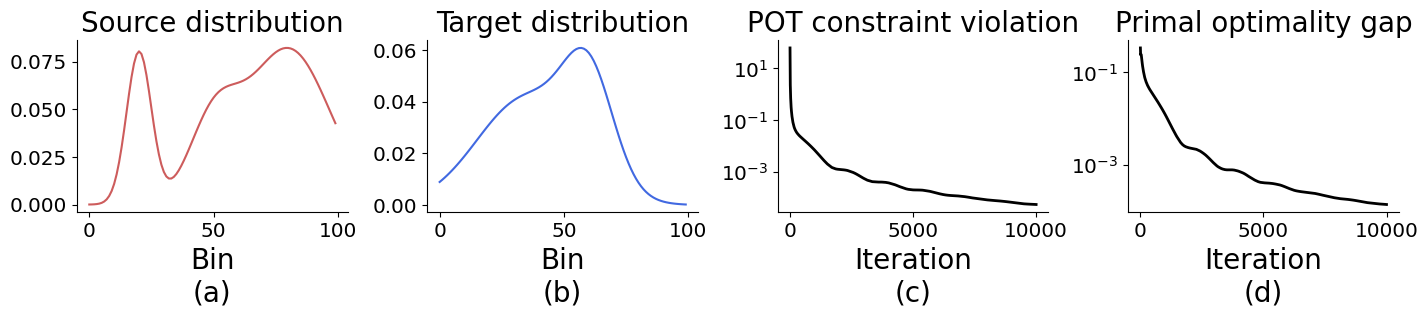

In [10]:
fig, (ax1, ax2, ax3, ax5) = plt.subplots(1, 4, figsize=(14, 3))

# Marginal distributions
# Plot source distribution
ax1.plot(np.arange(len(source_hist)), source_hist,
        color="indianred",
        label="Source distribution")
ax1.set_title("Source distribution", size=20)
ax1.set_xlabel("Bin\n(a)", size=20)
ax1.tick_params(axis='x', which='major', labelsize="x-large")
ax1.tick_params(axis='y', which='major', labelsize="x-large")
sns.despine(ax=ax1)

# Plot target distribution
ax2.plot(np.arange(len(target_hist)), target_hist,
        color="royalblue",
        label="Target distribution")
ax2.set_title("Target distribution", size=20)
ax2.set_xlabel("Bin\n(b)", size=20)
ax2.tick_params(axis='x', which='major', labelsize="x-large")
ax2.tick_params(axis='y', which='major', labelsize="x-large")
sns.despine(ax=ax2)


ax3.plot(np.array(logs_apdagd["row_cons_err"]) +
         np.array(logs_apdagd["col_cons_err"]) +
         np.array(logs_apdagd["total_mass_err"]),
         color="black", linestyle="solid", linewidth=2, label="APDAGD")
ax3.set_yscale("log")
ax3.set_title("POT constraint violation", size=20)
ax3.set_xlabel("Iteration\n(c)", size=20)
ax3.tick_params(axis='x', which='major', labelsize="x-large")
# ax3.legend(prop={'size': "xx-large"}, frameon=False)
# ax3.set_ylim([1e-6, 1e0])
ax3.tick_params(axis='y', which='major', labelsize="x-large")
sns.despine(ax=ax3)


ax5.plot([f - f_star for f in logs_apdagd["CX"]][:], label="APDAGD",
         color="black", linestyle="solid", linewidth=2,)
ax5.set_yscale("log")
ax5.tick_params(axis='x', which='major', labelsize="x-large")
# ax5.legend(prop={'size': "xx-large"}, frameon=False)
# ax5.set_ylim([1e-6, 1e0])
ax5.tick_params(axis='y', which='major', labelsize="x-large")
ax5.set_title("Primal optimality gap", size=20)
ax5.set_xlabel("Iteration\n(d)", size=20)
sns.despine(ax=ax5)

fig.tight_layout(pad=0.1, w_pad=0.1)

plt.savefig("figures/apdagd_synthetic.pdf", bbox_inches="tight")

plt.show()